In [1]:
# barplot
# https://12jeong.github.io/python-barplot/

# plot color
# https://matplotlib.org/stable/gallery/color/named_colors.html

# 신뢰 구간
# https://angie-gil.medium.com/평점-순으로-정렬하지-않는-법-이론편-9ced2f26bc4b

# Import Dataset and Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')
plt.rc('font', family='Malgun Gothic')

In [6]:
train_file = "../data/train_data.csv"
track_file = "../data/course.csv"

drop_columns = [
    'index',
    # 'track_K',
]
df_train = pd.read_csv(train_file)
df_train = df_train.drop(drop_columns, axis=1)

drop_columns = [
    'idx',
    # 'grand_prix_K',
    # 'cup_K',
    # 'track_name_K',
]
df_track = pd.read_csv(track_file)
df_track = df_track.drop(drop_columns, axis=1)

In [7]:
df_train.head()

,date,round,game_count,game_goal,cur_game_count,win_odds,lose_odds,track_K,track_E,cc,part_people,rank,prefix_rank,odds_result,significant,RESULT
0,20220204,1,3,15,1,4.71,1.27,와리오 스노 마운틴,Mount Wario,150,10,10,10,straight up,NaN,False
1,20220204,1,3,15,2,4.71,1.27,드래곤 드리프트 로드,Dragon Driftway,mirror,12,7,17,straight up,NaN,False
2,20220204,2,3,15,1,7.04,1.17,와리오 스노 마운틴,Mount Wario,150,11,2,2,underdog,NaN,True
3,20220204,2,3,15,2,7.04,1.17,3DS DK 정글,3DS DK Jungle,150,11,5,7,underdog,NaN,True
4,20220204,2,3,15,3,7.04,1.17,DS 와리오 스타디움,DS Wario Stardium,150,12,5,12,underdog,NaN,True


# Preprocessing

## columns drop and load

In [8]:
drop_columns = [
    "track_K",
    'RESULT',
]

X = df_train
# X = df_train.drop(drop_columns, axis=1)
# y = df_train['RESULT']

## checking error & missing value

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            632 non-null    int64 
 1   round           632 non-null    int64 
 2   game_count      632 non-null    object
 3   game_goal       632 non-null    object
 4   cur_game_count  632 non-null    int64 
 5   win_odds        631 non-null    object
 6   lose_odds       631 non-null    object
 7   track_K         632 non-null    object
 8   track_E         632 non-null    object
 9   cc              632 non-null    object
 10  part_people     632 non-null    int64 
 11  rank            632 non-null    int64 
 12  prefix_rank     632 non-null    int64 
 13  odds_result     623 non-null    object
 14  significant     11 non-null     object
 15  RESULT          623 non-null    object
dtypes: int64(6), object(10)
memory usage: 79.1+ KB


In [10]:
check_columns = [
    "game_count",
    "game_goal",
    "win_odds",
    "lose_odds",
    "track_E",
    "cc",
    "odds_result",
    "significant",
]

### game_count

In [11]:
X["game_count"].value_counts()

game_count
3          592
1           27
under 3      9
under 4      4
Name: count, dtype: int64

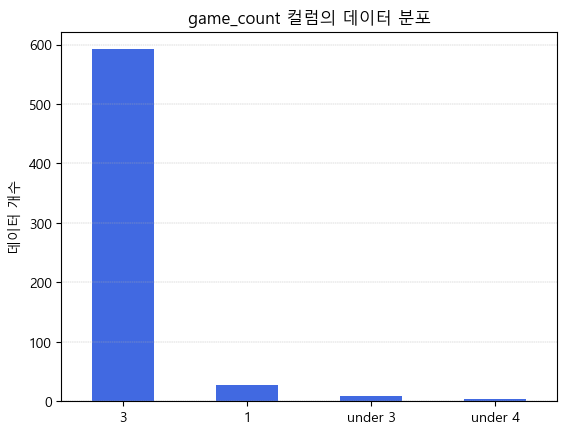

In [12]:
# bar plot으로 데이터 균형 살펴보기
X["game_count"].value_counts().plot.bar(
    color = ['royalblue'],
    rot=0
)

plt.title("game_count 컬럼의 데이터 분포")
plt.xlabel("")
plt.ylabel("데이터 개수")
plt.grid(True, linestyle='--', linewidth=0.3, axis='y')

In [13]:
X['game_count'] = X['game_count'].str.replace("under ", "")
X['game_count'] = X['game_count'].astype(int)
X['game_count'].value_counts()

game_count
3    601
1     27
4      4
Name: count, dtype: int64

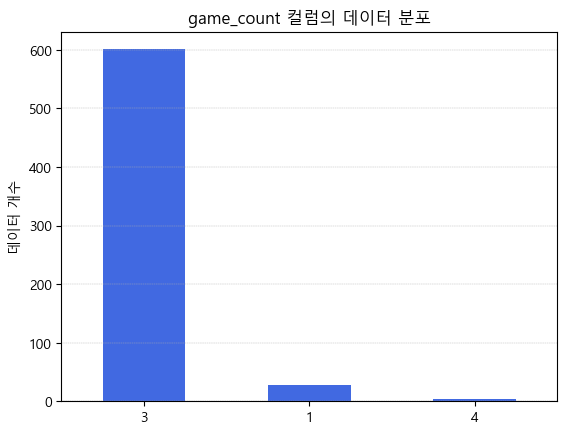

In [14]:
# bar plot으로 데이터 균형 살펴보기
X["game_count"].value_counts().plot.bar(
    color = ['royalblue'],
    rot=0
)

plt.title("game_count 컬럼의 데이터 분포")
plt.xlabel("")
plt.ylabel("데이터 개수")
plt.grid(True, linestyle='--', linewidth=0.3, axis='y')

### game_goal

In [15]:
X["game_goal"].value_counts()

game_goal
15          283
20          123
12           62
10           57
18           46
1            18
3            17
17            5
fix(etc)      4
30            3
22            3
13            2
25            2
5             2
27            2
19            2
fix(3)        1
Name: count, dtype: int64

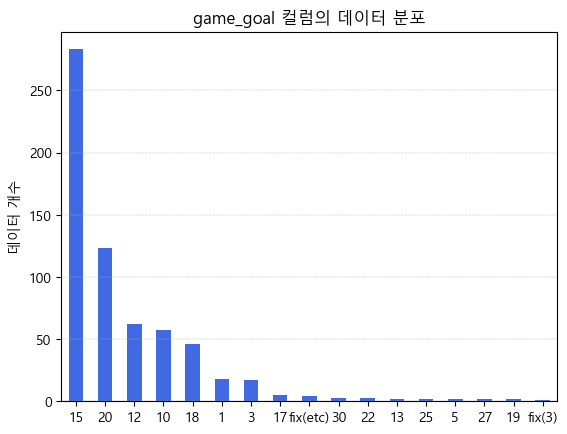

In [16]:
# bar plot으로 데이터 균형 살펴보기
X["game_goal"].value_counts().plot.bar(
    color = ['royalblue'],
    rot=0
)

plt.title("game_goal 컬럼의 데이터 분포")
plt.xlabel("")
plt.ylabel("데이터 개수")
plt.grid(True, linestyle='--', linewidth=0.3, axis='y')

In [17]:
# remove game_goal data that include word: "fix"
X = X.loc[~X['game_goal'].str.contains("fix")]
X["game_goal"] = X["game_goal"].astype(int)
X['game_goal'].value_counts()

game_goal
15    283
20    123
12     62
10     57
18     46
1      18
3      17
17      5
30      3
22      3
5       2
27      2
13      2
25      2
19      2
Name: count, dtype: int64

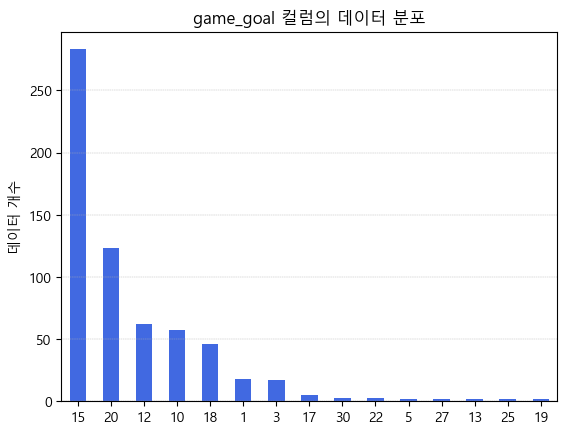

In [18]:
# bar plot으로 데이터 균형 살펴보기
X["game_goal"].value_counts().plot.bar(
    color = ['royalblue'],
    rot=0
)

plt.title("game_goal 컬럼의 데이터 분포")
plt.xlabel("")
plt.ylabel("데이터 개수")
plt.grid(True, linestyle='--', linewidth=0.3, axis='y')

### win_odds, lose_odds

In [19]:
X.isna().sum()

date                0
round               0
game_count          0
game_goal           0
cur_game_count      0
win_odds            1
lose_odds           1
track_K             0
track_E             0
cc                  0
part_people         0
rank                0
prefix_rank         0
odds_result         4
significant       621
RESULT              4
dtype: int64

In [20]:
X['win_odds'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
627    False
628    False
629    False
630    False
631    False
Name: win_odds, Length: 627, dtype: bool

In [21]:
# 배당은 독립변수이기에 fill하지 않고, row 제거
X = X.loc[~X['win_odds'].isna()]

In [22]:
# EDA 할 때 확인했던, 오류값 확인
X['win_odds'] = X['win_odds'].str.replace("..", "." ,regex=False)
X.loc[X['win_odds'].str.contains("\.\.")]

,date,round,game_count,game_goal,cur_game_count,win_odds,lose_odds,track_K,track_E,cc,part_people,rank,prefix_rank,odds_result,significant,RESULT


In [23]:
X['win_odds'] = X['win_odds'].astype(float)
X['lose_odds'] = X['lose_odds'].astype(float)

### track_K

In [24]:
# 영문 경기장 이름이 있기 때문에, 국문 데이터는 drop하기
X = X.drop(["track_K"], axis=1)

### track_E

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded = label_encoder.fit_transform(X['track_E'])
X['track_E_encoded'] = encoded
X

,date,round,game_count,game_goal,cur_game_count,win_odds,lose_odds,track_E,cc,part_people,rank,prefix_rank,odds_result,significant,RESULT,track_E_encoded
0,20220204,1,3,15,1,4.71,1.27,Mount Wario,150,10,10,10,straight up,NaN,False,41
1,20220204,1,3,15,2,4.71,1.27,Dragon Driftway,mirror,12,7,17,straight up,NaN,False,20
2,20220204,2,3,15,1,7.04,1.17,Mount Wario,150,11,2,2,underdog,NaN,True,41
3,20220204,2,3,15,2,7.04,1.17,3DS DK Jungle,150,11,5,7,underdog,NaN,True,0
4,20220204,2,3,15,3,7.04,1.17,DS Wario Stardium,150,12,5,12,underdog,NaN,True,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,20231222,3,3,10,1,7.16,1.16,DS Mario Circuit,150,11,9,9,straight up,NaN,False,13
628,20231222,4,3,10,1,8.24,1.14,Wii Grumble Volcano,150,12,12,12,straight up,NaN,False,82
629,20231222,5,3,18,1,1.87,2.15,GC Yoshi's Circuit,150,8,6,6,underdog,NaN,False,36
630,20231222,5,3,18,2,1.87,2.15,DS Walluigi Pinball,150,9,6,12,underdog,NaN,False,17


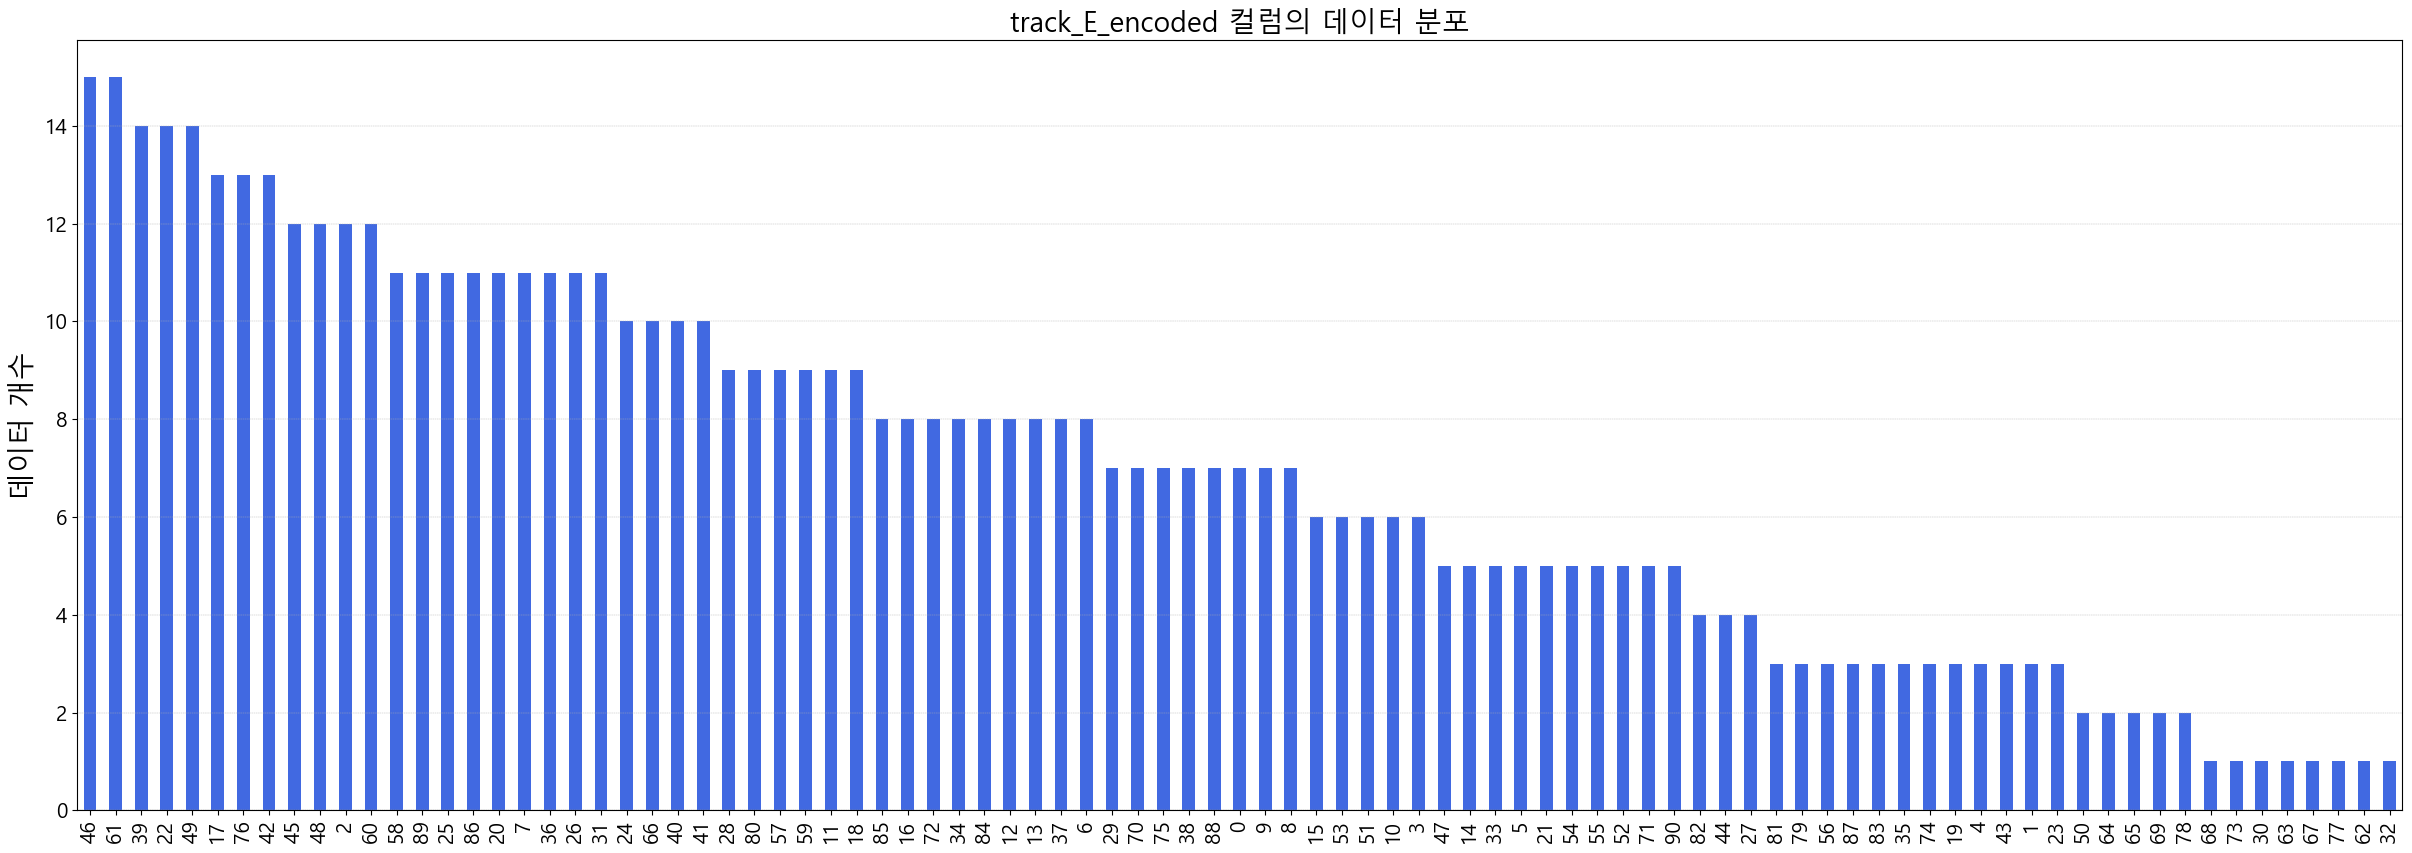

In [26]:
# bar plot으로 데이터 균형 살펴보기
X["track_E_encoded"].value_counts().plot.bar(
    figsize = (30, 10),
    color = ['royalblue'],
    rot=90,
    fontsize = 15,
)

plt.title("track_E_encoded 컬럼의 데이터 분포", fontsize = 20)
plt.xlabel("")
plt.ylabel("데이터 개수", fontsize = 20)
plt.grid(True, linestyle='--', linewidth=0.3, axis='y')

In [27]:
track_2_num = dict()
num_2_track = dict()

for num, track in enumerate(label_encoder.classes_):
    track_2_num[track] = num
    num_2_track[num] = track
    
track_2_num

{'3DS DK Jungle': 0,
 '3DS Music Park': 1,
 '3DS Neo Bowser City': 2,
 '3DS Piranha Plant Slide': 3,
 '3DS Rainbow Road': 4,
 '3DS Rock Rock Mountain': 5,
 '3DS Toad Circuit': 6,
 'Animal Crossing': 7,
 'Big Blue': 8,
 'Bone Dry Dunes': 9,
 "Bowser's Castle": 10,
 'Cloudtop Cruise': 11,
 'DS Cheep Cheep Beach': 12,
 'DS Mario Circuit': 13,
 'DS Peach Gardens': 14,
 'DS Shroom Ridge': 15,
 'DS Tick Tock Clock': 16,
 'DS Walluigi Pinball': 17,
 'DS Wario Stardium': 18,
 'Dolphin Shoals': 19,
 'Dragon Driftway': 20,
 'Electrodrome': 21,
 'Excitebike Arena': 22,
 'GBA Boo Lake': 23,
 'GBA Cheese Land': 24,
 'GBA Mario Circuit': 25,
 'GBA Ribbon Road': 26,
 'GBA Riverside Park': 27,
 'GBA Sky Garden': 28,
 'GBA Snow Land': 29,
 'GBA Sunset Wilds': 30,
 'GC Baby Park': 31,
 'GC DK Mountain': 32,
 'GC Dry Dry Desert': 33,
 'GC Sherbet Land': 34,
 'GC Waluigi Stadium': 35,
 "GC Yoshi's Circuit": 36,
 'Hyrule Circuit': 37,
 'Ice Ice Outpost': 38,
 'Mario Circuit': 39,
 'Mario Kart Stadium': 40,

### cc

In [28]:
X['cc'].value_counts()

cc
150       560
mirror     38
200        28
Name: count, dtype: int64

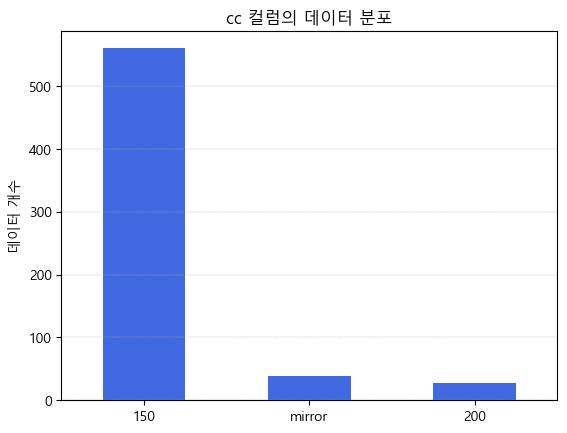

In [29]:
# bar plot으로 데이터 균형 살펴보기
X["cc"].value_counts().plot.bar(
    color = ['royalblue'],
    rot=0
)

plt.title("cc 컬럼의 데이터 분포")
plt.xlabel("")
plt.ylabel("데이터 개수")
plt.grid(True, linestyle='--', linewidth=0.3, axis='y')

In [30]:
# mirror는 맵 대칭만 적용이고, 속도는 150cc임을 감안하여 150으로 변경
X['cc'].replace("mirror", "150", inplace=True)
X['cc'] = X['cc'].astype(int)

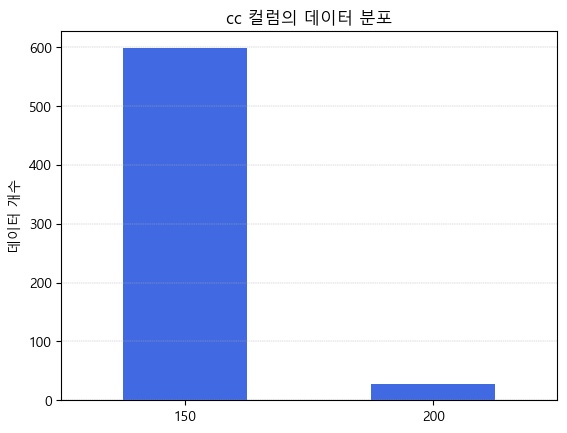

In [31]:
# bar plot으로 데이터 균형 살펴보기
X["cc"].value_counts().plot.bar(
    color = ['royalblue'],
    rot=0
)

plt.title("cc 컬럼의 데이터 분포")
plt.xlabel("")
plt.ylabel("데이터 개수")
plt.grid(True, linestyle='--', linewidth=0.3, axis='y')

### odds_result

In [32]:
X['odds_result'].isna().sum()

4

In [33]:
X['odds_result'].value_counts()

odds_result
straight up    436
underdog       186
Name: count, dtype: int64

In [34]:
# 배당 결과가 없는 오류 row 제거
X = X.loc[~X['odds_result'].isna()]

In [35]:
# 원핫인코딩으로 정배-역배 여부 인코딩하기
from sklearn.preprocessing import OneHotEncoder

X['odds_result'] = X['odds_result'].replace("straight up", "SU").replace("underdog", "UD")

encoder = OneHotEncoder(sparse=False)
encoded = encoder.fit_transform(X[['odds_result']])

df_encoded = pd.DataFrame(encoded.astype(int), columns=encoder.get_feature_names_out())
X = pd.concat([X.reset_index(), df_encoded], axis=1)

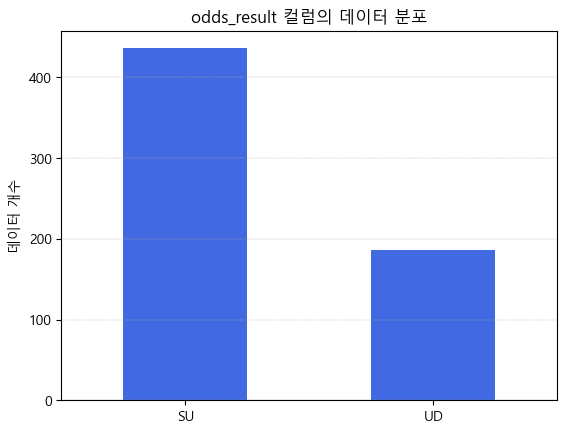

In [36]:
# bar plot으로 데이터 균형 살펴보기
X["odds_result"].value_counts().plot.bar(
    color = ['royalblue'],
    rot=0
)

plt.title("odds_result 컬럼의 데이터 분포")
plt.xlabel("")
plt.ylabel("데이터 개수")
plt.grid(True, linestyle='--', linewidth=0.3, axis='y')

### significant

In [37]:
# significant의 특이사항들(CANCEL, MISS, NOT OPEN 등) 제외
X = X.loc[X['significant'].isna()]

### RESULT

In [38]:
X['RESULT'].value_counts()

RESULT
False    442
True     178
Name: count, dtype: int64

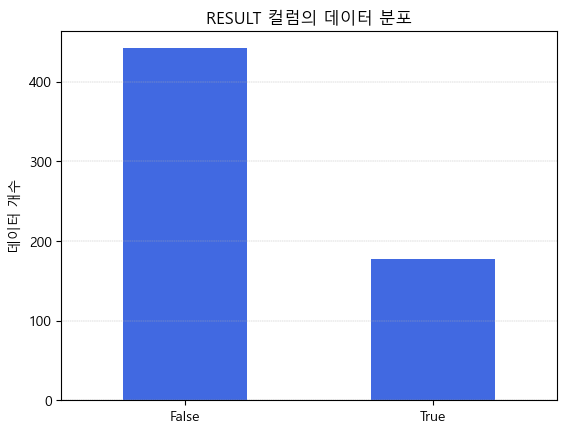

In [39]:
# bar plot으로 데이터 균형 살펴보기
X["RESULT"].value_counts().plot.bar(
    color = ['royalblue'],
    rot=0
)

plt.title("RESULT 컬럼의 데이터 분포")
plt.xlabel("")
plt.ylabel("데이터 개수")
plt.grid(True, linestyle='--', linewidth=0.3, axis='y')

### corr

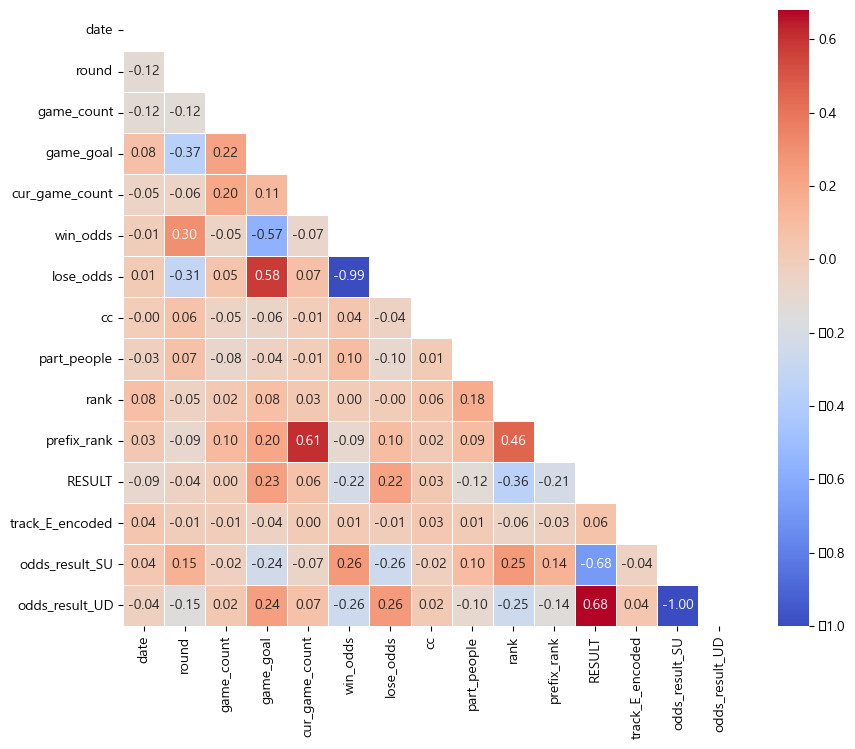

In [40]:
method = "kendall" # "spearman"

corr_matrix = X.drop(['index', 'track_E', 'significant', 'odds_result'], axis=1).corr(
    method = method
)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.show()

# Save Preprocess Csv Data

In [41]:
X.to_csv("preprocessing.csv", index = False)

# Modeling Data Subset

In [42]:
X, y_rank, y_result = X.drop(['rank', 'RESULT'], axis=1), X['rank'], X['RESULT'].astype(bool)

In [43]:
X.head()

,index,date,round,game_count,game_goal,cur_game_count,win_odds,lose_odds,track_E,cc,part_people,prefix_rank,odds_result,significant,track_E_encoded,odds_result_SU,odds_result_UD
0,0,20220204,1,3,15,1,4.71,1.27,Mount Wario,150,10,10,SU,NaN,41,1,0
1,1,20220204,1,3,15,2,4.71,1.27,Dragon Driftway,150,12,17,SU,NaN,20,1,0
2,2,20220204,2,3,15,1,7.04,1.17,Mount Wario,150,11,2,UD,NaN,41,0,1
3,3,20220204,2,3,15,2,7.04,1.17,3DS DK Jungle,150,11,7,UD,NaN,0,0,1
4,4,20220204,2,3,15,3,7.04,1.17,DS Wario Stardium,150,12,12,UD,NaN,18,0,1


In [44]:
y_rank.head()

0    10
1     7
2     2
3     5
4     5
Name: rank, dtype: int64

In [45]:
y_result.head()

0    False
1    False
2     True
3     True
4     True
Name: RESULT, dtype: bool

# Modeling

In [46]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import hamming_loss
from sklearn.metrics import jaccard_score

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
)

TEST_SIZE = 0.2
RANDOM_STATE = 42

In [47]:
features_to_drop = [
    'index',
    'date',
    'round', #
    # 'game_count',
    # 'game_goal',
    # 'cur_game_count',
    'win_odds', #
    'lose_odds', #
    'track_E',
    # 'cc',
    # 'part_people',
    # 'rank', -- already drop
    'prefix_rank', #
    'odds_result',
    'significant',
    # 'track_E_encoded',
    'odds_result_SU', #
    'odds_result_UD', #
]

X.head()

,index,date,round,game_count,game_goal,cur_game_count,win_odds,lose_odds,track_E,cc,part_people,prefix_rank,odds_result,significant,track_E_encoded,odds_result_SU,odds_result_UD
0,0,20220204,1,3,15,1,4.71,1.27,Mount Wario,150,10,10,SU,NaN,41,1,0
1,1,20220204,1,3,15,2,4.71,1.27,Dragon Driftway,150,12,17,SU,NaN,20,1,0
2,2,20220204,2,3,15,1,7.04,1.17,Mount Wario,150,11,2,UD,NaN,41,0,1
3,3,20220204,2,3,15,2,7.04,1.17,3DS DK Jungle,150,11,7,UD,NaN,0,0,1
4,4,20220204,2,3,15,3,7.04,1.17,DS Wario Stardium,150,12,12,UD,NaN,18,0,1


In [48]:
Xt = X.drop(features_to_drop, axis=1)

### rank 컬럼에 대해서 model 학습하기

In [49]:
# 테스트셋 분리
X_rank_train, X_rank_test, y_rank_train, y_rank_test = train_test_split(
    Xt,
    y_rank,
    test_size = TEST_SIZE,
    random_state = RANDOM_STATE
)

# 모델 초기화 및 학습
rank_model = LinearRegression()
rank_model.fit(X_rank_train, y_rank_train)

LinearRegression()

In [50]:
# X 데이터 크기
X_rank_train.shape, X_rank_test.shape

((496, 6), (124, 6))

In [51]:
# rank 데이터 크기
y_rank_train.shape, y_rank_test.shape

((496,), (124,))

### 모델 학습

In [52]:
from sklearn.metrics import mean_squared_error

# 훈련 세트에서의 성능 평가
y_rank_train_pred = rank_model.predict(X_rank_train)
train_accuracy = mean_squared_error(y_rank_train, y_rank_train_pred, squared=False)

# 테스트 세트에서의 성능 평가
y_rank_test_pred = rank_model.predict(X_rank_test)
test_accuracy = mean_squared_error(y_rank_test, y_rank_test_pred, squared=False)

# 성능 결과 출력
train_accuracy, test_accuracy

(2.9518428368173297, 2.9911971002461475)

In [53]:
columns_name = [
    'game_count',
    'game_goal',
    'cur_game_count',
    'cc',
    'part_people',
    'track_E_encoded',
]

new_data = [
    1,    # 'game_count'
    12,   # 'game_goal'
    2,    # 'cur_game_count'
    150,  # 'cc'
    12,   # 'part_people'
    71,  # 'track_E_encoded'
]

df = pd.DataFrame([new_data], columns=columns_name)
proba = rank_model.predict(df)
f'{proba[0]:.0f}등'

'6등'

### RESULT 컬럼에 대해서 model 학습하기

In [54]:
# 테스트셋 분리
X_result_train, X_result_test, y_result_train, y_result_test = train_test_split(
    Xt,
    y_result,
    test_size = TEST_SIZE,
    random_state = RANDOM_STATE
)

# 모델 초기화 및 학습
result_model = LogisticRegression(solver='liblinear') # 'liblinear'는 소규모 데이터셋에 적합
result_model.fit(X_result_train, y_result_train)

LogisticRegression(solver='liblinear')

In [55]:
# X 데이터 크기
X_result_train.shape, X_result_test.shape

((496, 6), (124, 6))

In [56]:
# result 데이터 크기
y_result_train.shape, y_result_test.shape

((496,), (124,))

### 모델 학습

In [57]:
# 훈련 세트에서의 성능 평가
y_result_train_pred = result_model.predict(X_result_train)
train_accuracy = accuracy_score(y_result_train, y_result_train_pred)

# 테스트 세트에서의 성능 평가
y_result_test_pred = result_model.predict(X_result_test)
test_accuracy = accuracy_score(y_result_test, y_result_test_pred)

# 성능 결과 출력
train_accuracy, test_accuracy

(0.7641129032258065, 0.6854838709677419)

In [58]:
columns_name = [
    'game_count',
    'game_goal',
    'cur_game_count',
    'cc',
    'part_people',
    'track_E_encoded',
]

new_data = [
    1,    # 'game_count'
    12,   # 'game_goal'
    2,    # 'cur_game_count'
    150,  # 'cc'
    12,   # 'part_people'
    71,  # 'track_E_encoded'
]

df = pd.DataFrame([new_data], columns=columns_name)
proba = result_model.predict_proba(df)
f, t = proba.flatten()

print(f"True  probability: {t}")
print(f"False probability: {f}")

True  probability: 0.5775440973135332
False probability: 0.4224559026864668


In [59]:
num_2_track[41], track_2_num['Big Blue']

('Mount Wario', 8)

In [60]:
coefficients = result_model.coef_[0]  # 이진 분류의 경우

# 계수의 절대값을 기준으로 특성 중요도 확인
importance = np.abs(coefficients)

# 특성 중요도 출력
for i, v in enumerate(importance):
    print(f'Feature: {i}, Score: {v}')

Feature: 0, Score: 0.9006038166320627
Feature: 1, Score: 0.16629207849524597
Feature: 2, Score: 0.10983134406045209
Feature: 3, Score: 0.0044459104004055065
Feature: 4, Score: 0.2264303711721163
Feature: 5, Score: 0.011115463683966171


In [64]:
pp = "../data/preprocessing.csv"
df_pp = pd.read_csv(pp)
df_pp

,index,date,round,game_count,game_goal,cur_game_count,win_odds,lose_odds,track_E,cc,part_people,rank,prefix_rank,odds_result,significant,RESULT,track_E_encoded,odds_result_SU,odds_result_UD
0,0,20220204,1,3,15,1,4.71,1.27,Mount Wario,150,10,10,10,SU,NaN,False,41,1,0
1,1,20220204,1,3,15,2,4.71,1.27,Dragon Driftway,150,12,7,17,SU,NaN,False,20,1,0
2,2,20220204,2,3,15,1,7.04,1.17,Mount Wario,150,11,2,2,UD,NaN,True,41,0,1
3,3,20220204,2,3,15,2,7.04,1.17,3DS DK Jungle,150,11,5,7,UD,NaN,True,0,0,1
4,4,20220204,2,3,15,3,7.04,1.17,DS Wario Stardium,150,12,5,12,UD,NaN,True,18,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,627,20231222,3,3,10,1,7.16,1.16,DS Mario Circuit,150,11,9,9,SU,NaN,False,13,1,0
616,628,20231222,4,3,10,1,8.24,1.14,Wii Grumble Volcano,150,12,12,12,SU,NaN,False,82,1,0
617,629,20231222,5,3,18,1,1.87,2.15,GC Yoshi's Circuit,150,8,6,6,UD,NaN,False,36,0,1
618,630,20231222,5,3,18,2,1.87,2.15,DS Walluigi Pinball,150,9,6,12,UD,NaN,False,17,0,1
